In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 30
CHANNELS=3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Food Classification",
    shuffle=True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 6269 files belonging to 20 classes.


In [5]:
class_names = dataset.class_names
class_names

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [6]:
len(dataset)

196

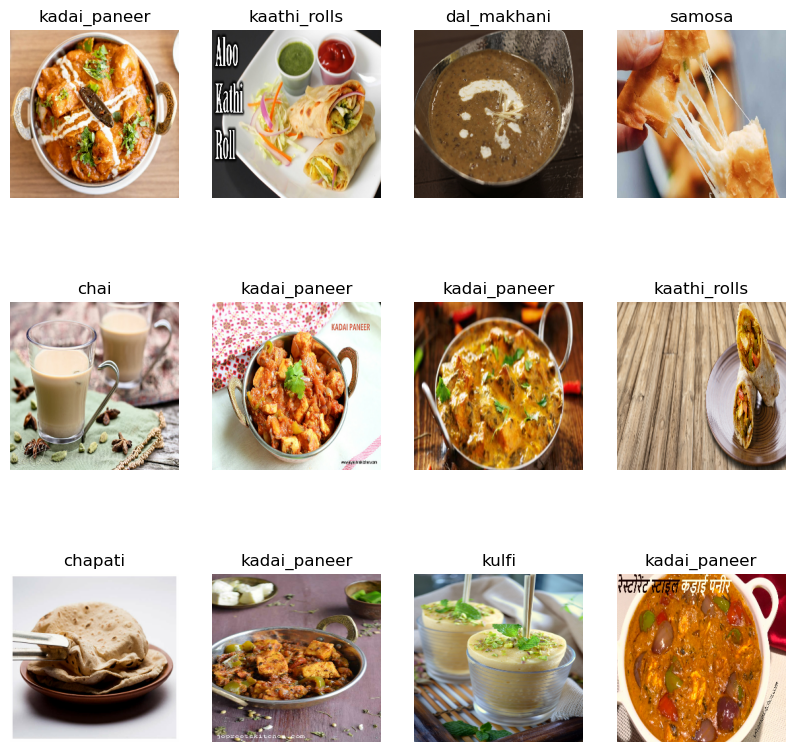

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [8]:
train_size = 0.8
len(dataset)*0.8

156.8

In [9]:
train_ds = dataset.take(156) # first 54
len(train_ds)

156

In [10]:
test = dataset.skip(156)  # skip first 54 batches
len(test)

40

In [11]:
valid_ds = test.take(20)
len(valid_ds)
test_ds = test.skip(20)
len(test_ds)

20

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
n_classes = len(class_names)
n_classes

20

In [24]:
input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
    
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/10
156/156 [==============================] - 203s 1s/step - loss: 2.5470 - accuracy: 0.1897 - val_loss: 2.5618 - val_accuracy: 0.1828
Epoch 2/10
156/156 [==============================] - 198s 1s/step - loss: 2.3538 - accuracy: 0.2572 - val_loss: 2.2799 - val_accuracy: 0.2812
Epoch 3/10
156/156 [==============================] - 189s 1s/step - loss: 2.2284 - accuracy: 0.3107 - val_loss: 2.2614 - val_accuracy: 0.3031
Epoch 4/10
156/156 [==============================] - 187s 1s/step - loss: 2.1186 - accuracy: 0.3435 - val_loss: 2.1651 - val_accuracy: 0.3359
Epoch 5/10
156/156 [==============================] - 188s 1s/step - loss: 1.9982 - accuracy: 0.3866 - val_loss: 2.0732 - val_accuracy: 0.3703
Epoch 6/10
156/156 [==============================] - 189s 1s/step - loss: 1.9087 - accuracy: 0.4105 - val_loss: 2.0461 - val_accuracy: 0.3641
Epoch 7/10
156/156 [==============================] - 187s 1s/step - loss: 1.7960 - accuracy: 0.4421 - val_loss: 1.9332 - val_accuracy: 0.4156

In [30]:
scores = model.evaluate(test_ds)

20/20 [==============================] - 4s 187ms/step - loss: 1.8531 - accuracy: 0.4113


In [31]:
scores

[1.8531421422958374, 0.41130298376083374]

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

1/1 [==============================] - 0s 282ms/step
momos


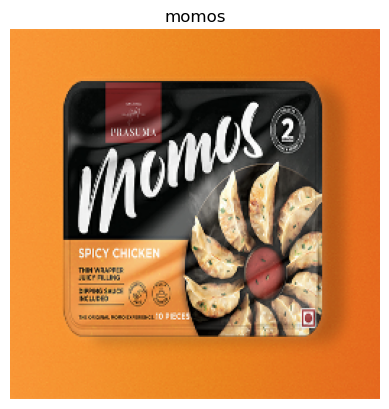

In [33]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):

    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')
    batch_pred = model.predict(image_batch)
    print(class_names[np.argmax(batch_pred[0])])

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


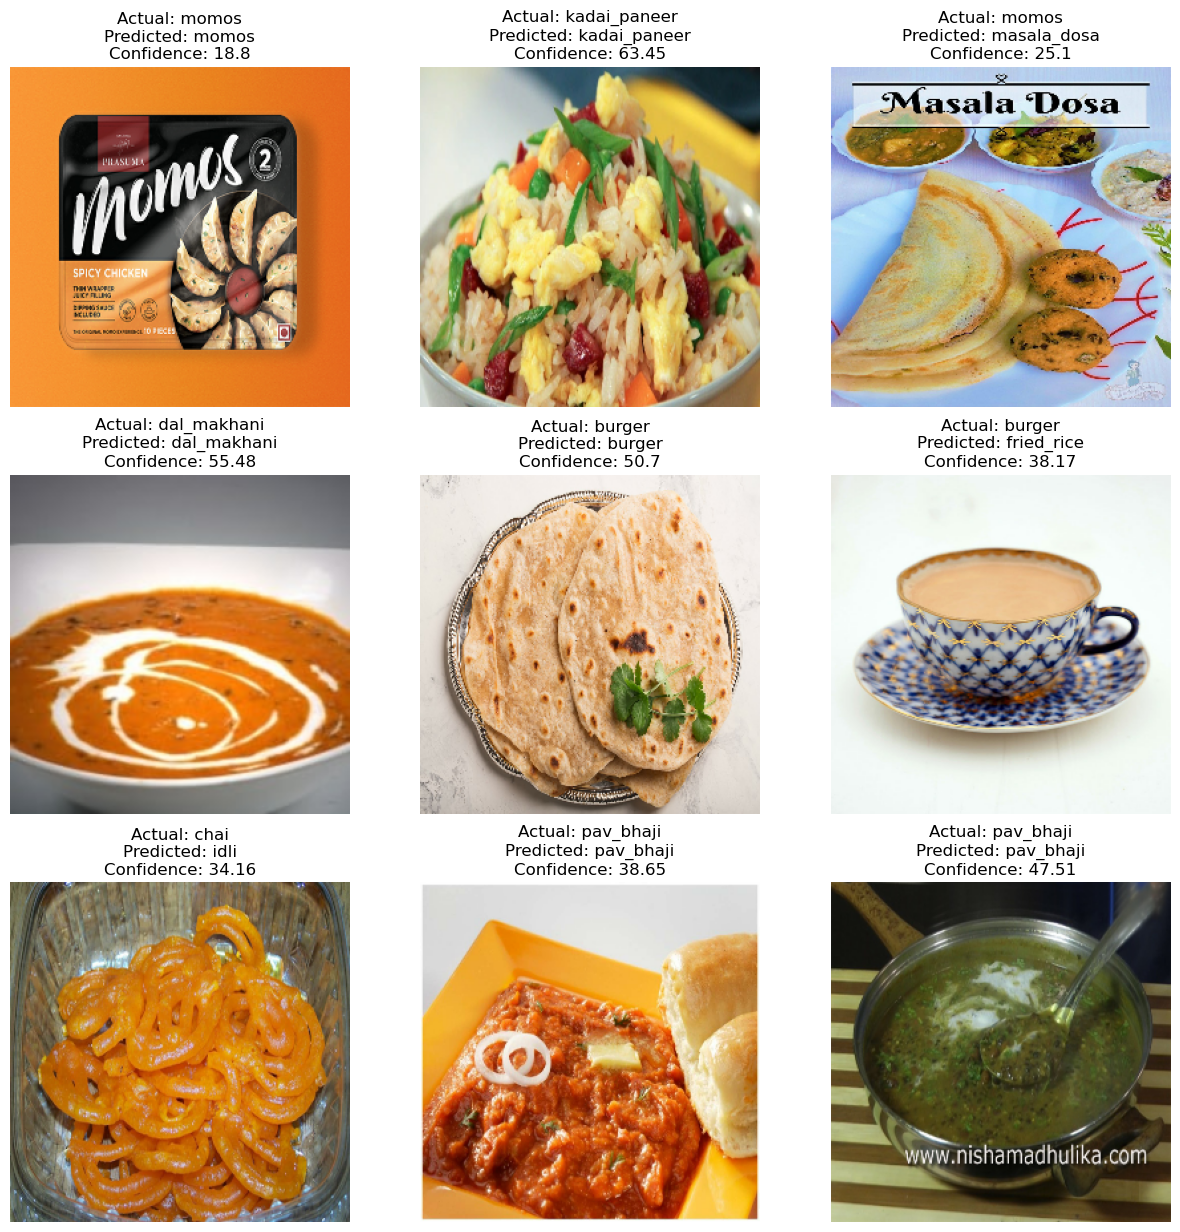

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}")
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
     